In [47]:
!pip install graphviz==0.10
!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [31]:
import pandas as pd

dados = pd.read_csv('/content/car_prices.csv', index_col=0)
dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [32]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [33]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [34]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,22
1,7843,1998,40557.96,1,24
2,7109,2006,89627.50,0,16
3,26823,2015,95276.14,0,7
4,7935,2014,117384.68,1,8


In [35]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,21801,2000,30941.02,1,22,35085.22134
1,7843,1998,40557.96,1,24,12622.05362
2,7109,2006,89627.50,0,16,11440.79806
3,26823,2015,95276.14,0,7,43167.32682
4,7935,2014,117384.68,1,8,12770.11290


In [36]:
dados = dados.drop(columns=['milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [37]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 9
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED,
                                                        test_size=0.25,
                                                        stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [38]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do algoritmo dummy_stratified baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo dummy_stratified baseline foi 58.00%


In [39]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
previsoes = dummy_most_frequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do algoritmo dummy_most_frequent baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo dummy_most_frequent baseline foi 58.00%


In [42]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)
print("A acurácia do algoritmo dummy_stratified baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo dummy_stratified baseline foi 0.58%


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 9
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                                random_state=SEED,
                                                                test_size=0.25,
                                                                stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 75.72%


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 9
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                                random_state=SEED,
                                                                test_size=0.25,
                                                                stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.92%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


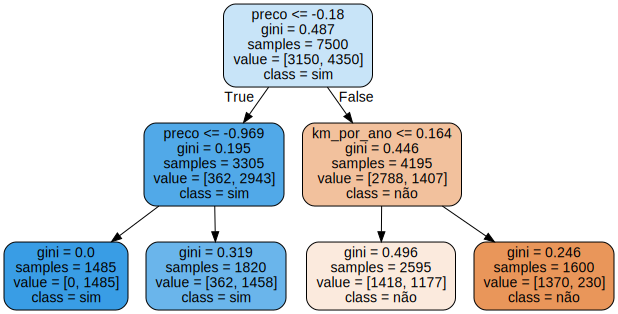

In [52]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, 
                           out_file=None,
                           filled=True,
                           rounded=True,
                           feature_names=x.columns,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 9
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED,
                                                        test_size=0.25,
                                                        stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.76%


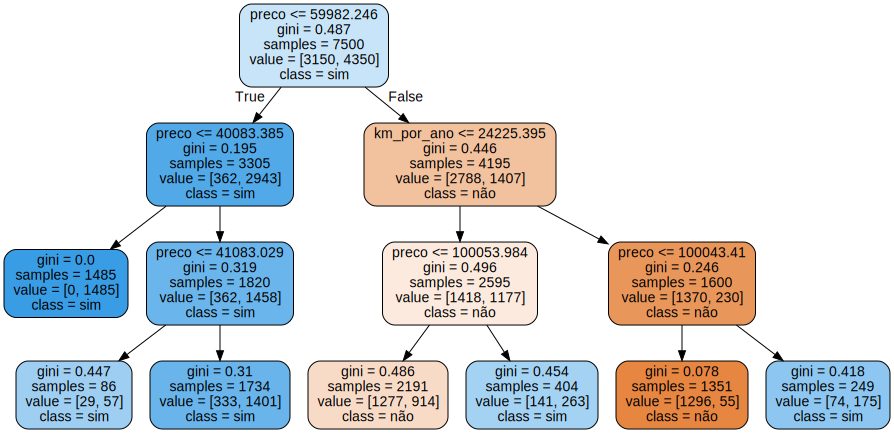

In [56]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, 
                           out_file=None,
                           filled=True,
                           rounded=True,
                           feature_names=x.columns,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico